In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from datetime import datetime

In [3]:
stat_df = pd.read_csv('data/statipy_results.csv')

In [4]:
stat_df['Rdate'] = pd.to_datetime(stat_df['Rdate'])

In [6]:
statipy_df = stat_df.drop('Unnamed: 0', axis=1)

## 1. statipy_df = drop extra index, ++ count columns

In [8]:
statipy_df['songfreq'] = statipy_df.groupby('Track')['Track'].transform('count')
statipy_df['artsongcnt'] = statipy_df.groupby('Artist')['Track'].transform('count')

In [9]:
statipycounts_df = statipy_df

## 2.  statipycounts_df 

In [14]:
statipycounts_df.groupby(['Artist', 'Rdate', 'Track'])[['Tpopularity']].describe()

Tpopularity  \
                                                                                            count   
Artist                  Rdate      Track                                                            
!!!                     2017-03-22 The One 2                                                  2.0   
2Pac                    2014-11-07 California Love                                            1.0   
Aaron Copland           1960-01-01 Appalachian Spring: VII. Doppio movimento                  1.0   
Adam Joseph             2017-05-03 Linda Evangelista (feat. Aja)                              1.0   
Adore Delano            2014-06-03 I Adore You                                                1.0   
Adrianne Lenker         2018-10-05 symbol                                                     1.0   
Agnes Obel              2013-01-01 September Song                                             1.0   
Ah-Mer-Ah-Su            2017-02-26 Meg Ryan                                                   2.0   
Aja                     2017-02-02 Level Ya Pussy Up                                          1.0   
                        2017-04-21 C.L.A.T. (feat. DJ Mitch Ferrino)                          1.0   
                        2018-03-01 Finish Her!                                                1.0   
                        2018-05-07 Brujería                                                   1.0   
                        2018-10-17 Demons Witches & Bitches                                   1.0   
Al B. Sure!             1988-04-26 Nite and Day                                               1.0   
Alabama Shakes          2012-01-01 Hold On                                                    1.0   
                        2015-04-21 Don't Wanna Fight                                          1.0   
                                   Sound & Color                                              1.0   
                                   This Feeling                                               1.0   
Alaska Thunderfuck      2015-06-23 This Is My Hair                                            1.0   
                                   Your Makeup Is Terrible                                    1.0   
                        2016-10-14 Stun (feat. Gia Gunn)                                      1.0   
                                   The T (feat. Adore Delano)                                 1.0   
Alban Berg              2012-01-01 Violin Concerto - 'To the Memory of an Angel': ...         1.0   
Alice Cooper            1972-01-01 School's Out                                               1.0   
Allen Toussaint         1975-01-01 Basic Lady - Remastered Version                            1.0   
Amadou & Mariam         2008-11-17 Djama                                                      2.0   
Amara La Negra          2018-02-20 What a Bam Bam                                             1.0   
Angel Haze              2012-01-01 Werkin' Girls                                              4.0   
Angel Olsen             2016-09-02 Give It Up                                                 1.0   
Anita O'Day             1941-01-01 That's What You Think                                      1.0   
...                                                                                           ...   
Wilson Pickett          2017-11-24 You Left The Water Running - 2007 Remastered Ve...         1.0   
Wolfgang Amadeus Mozart 1995-11-01 Piano Concerto No. 21 in C Major, K. 467 "Elvir...         1.0   
                        2004-01-01 Le Nozze di Figaro, K. 492: Sinfonia                       1.0   
                        2006-06-05 Mozart / Arr Grieg: Piano Sonata No. 16 in C Ma...         1.0   
                        2011-02-08 Sonata No. 13 in B-Flat Major, K. 333: I. Allegro          1.0   
Wynona Carr             1993-01-01 Please Mr. Jailer                                          1.0   
Wynonie Harris          2014-04-19 Lovin' Mach

## 3. Divide by count

In [15]:
no_solo = statipycounts_df[statipycounts_df['songfreq']>=2]
no_solo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 5 to 987
Data columns (total 8 columns):
Track          378 non-null object
Explicit       378 non-null bool
Tpopularity    378 non-null int64
Artist         378 non-null object
Album          378 non-null object
Rdate          378 non-null datetime64[ns]
songfreq       378 non-null int64
artsongcnt     378 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(3), object(3)
memory usage: 24.0+ KB


In [26]:
solo_df = statipycounts_df[statipycounts_df['songfreq']<=1]
solo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 0 to 990
Data columns (total 8 columns):
Track          613 non-null object
Explicit       613 non-null bool
Tpopularity    613 non-null int64
Artist         613 non-null object
Album          613 non-null object
Rdate          613 non-null datetime64[ns]
songfreq       613 non-null int64
artsongcnt     613 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(3), object(3)
memory usage: 38.9+ KB


## 4.  Artist : solo - avg per release date

In [31]:
artistdf1 = solo_df.groupby(['Artist', 'Rdate'])[['Tpopularity','Explicit', 'artsongcnt', 'songfreq']].mean()
artistdf1

Tpopularity  Explicit  artsongcnt  \
Artist                  Rdate                                           
2Pac                    2014-11-07    43.000000       1.0         1.0   
Aaron Copland           1960-01-01    50.000000       0.0         1.0   
Adam Joseph             2017-05-03    40.000000       0.0         1.0   
Adore Delano            2014-06-03    49.000000       1.0         1.0   
Adrianne Lenker         2018-10-05    58.000000       0.0         1.0   
Agnes Obel              2013-01-01    53.000000       0.0         1.0   
Aja                     2017-02-02    49.000000       0.0         5.0   
                        2017-04-21    47.000000       1.0         5.0   
                        2018-03-01    45.000000       1.0         5.0   
                        2018-05-07    47.000000       1.0         5.0   
                        2018-10-17    37.000000       1.0         5.0   
Al B. Sure!             1988-04-26    53.000000       0.0         1.0   
Alabama Shakes          2015-04-21    43.333333       0.0         4.0   
Alaska Thunderfuck      2015-06-23    46.500000       0.0         4.0   
                        2016-10-14    48.000000       1.0         4.0   
Alban Berg              2012-01-01    45.000000       0.0         1.0   
Alice Cooper            1972-01-01    66.000000       0.0         1.0   
Allen Toussaint         1975-01-01    22.000000       0.0         1.0   
Amara La Negra          2018-02-20    46.000000       0.0         1.0   
Angel Olsen             2016-09-02    50.000000       0.0         1.0   
Anita O'Day             1941-01-01    44.000000       0.0         4.0   
                        1955-01-01    48.000000       0.0         4.0   
                        1961-03-14    45.000000       0.0         4.0   
                        2015-02-12    57.000000       0.0         4.0   
Antonio Vivaldi         2014-01-01    63.000000       0.0         2.0   
                        2018-03-30    42.000000       0.0         2.0   
Aquaria                 2018-06-29    38.000000       0.0         1.0   
Aretha Franklin         1967-03-10    73.000000       0.0         1.0   
Ariana Grande           2018-08-17    89.000000       0.0         6.0   
                        2018-11-03    88.000000       1.0         6.0   
...                                         ...       ...         ...   
Tuck & Patti            2004-01-01     0.000000       0.0         2.0   
UGK                     2007-08-07    55.000000       1.0         1.0   
Vanessa Vanjie Mateo    2018-06-21    43.000000       1.0         1.0   
Varetta Dillard         2011-04-12     5.000000       0.0         1.0   
Vic Damone              1956-01-01    45.000000       0.0         2.0   
                        2012-01-01    58.000000       0.0         2.0   
Violent Femmes          1983-01-01    58.333333       0.0        10.0   
                        1991-04-26    36.000000       0.0        10.0   
Voyage                  2018-02-14    49.000000       0.0         1.0   
Ween                    1994-01-01    43.000000       0.0         1.0   
Whitney Houston         1987-01-01    60.000000       0.0         2.0   
                        2006-05-02    55.000000       0.0         2.0   
Willam                  2013-04-18    40.000000       0.0         2.0   
                        2015-06-02    40.000000       0.0         2.0   
Willie Mitchell         2014-01-01    39.000000       0.0         1.0   
Willow                  2010-10-26     3.000000       0.0         1.0   
Wilson Pickett          1966-01-01    42.000000       0.0         3.0   
                        2017-11-24    35.500000       0.0         3.0   
Wolfgang Amadeus Mozart 1995-11-01    68.000000       0.0         4.0   
                        2004-01-01    64.000000       0.0         4.0   
                        2006-06-05    62.000000       0.0         4.0   
                        2011-02-08    48.000000       0.0         4.0   
Wynona Carr          

## 5.  Artist : solo - avg per release date - (artist with most tracks)

In [29]:
artist_mostsolo = artistdf1[artistdf1['artsongcnt']>=5]
artist_mostsolo

Tpopularity  Explicit  artsongcnt  songfreq
Artist                Rdate                                                  
Aja                   2017-02-02    49.000000       0.0         5.0       1.0
                      2017-04-21    47.000000       1.0         5.0       1.0
                      2018-03-01    45.000000       1.0         5.0       1.0
                      2018-05-07    47.000000       1.0         5.0       1.0
                      2018-10-17    37.000000       1.0         5.0       1.0
Ariana Grande         2018-08-17    89.000000       0.0         6.0       1.0
                      2018-11-03    88.000000       1.0         6.0       1.0
Billie Holiday        1933-01-01    42.666667       0.0         7.0       1.0
                      1956-01-01    55.000000       0.0         7.0       1.0
                      1957-01-01    47.500000       0.0         7.0       1.0
                      1958-01-01    43.000000       0.0         7.0       1.0
Bo Diddley            1974-01-01    42.000000       0.0         7.0       1.0
                      1990-07-26    39.000000       0.0         7.0       1.0
                      1997-01-01    40.000000       0.0         7.0       1.0
Camille Saint-Saëns   1989-01-01    20.142857       0.0        15.0       1.0
                      2015-09-18    62.000000       0.0        15.0       1.0
Ciara                 2004-09-24    65.000000       0.0         5.0       1.0
Deftones              1997-10-27    64.000000       0.0         8.0       1.0
                      2000-05-16    59.400000       0.0         8.0       1.0
                      2010-04-23    53.000000       0.0         8.0       1.0
Eartha Kitt           2003-12-09    51.000000       0.0         6.0       1.0
                      2011-03-15    26.000000       0.0         6.0       1.0
Ella Fitzgerald       1956-01-01    51.000000       0.0         7.0       1.0
                      2004-01-01     5.000000       0.0         7.0       1.0
                      2014-01-31    50.000000       0.0         7.0       1.0
                      2017-09-29    52.000000       0.0         7.0       1.0
Frou Frou             2002-01-01    39.000000       0.0         5.0       1.0
Janelle Monáe         2018-04-27    61.500000       1.0         6.0       1.0
Johann Sebastian Bach 1997-01-01    40.000000       0.0         6.0       1.0
                      2002-08-27    47.000000       0.0         6.0       1.0
...                                       ...       ...         ...       ...
RuPaul                1993-06-08    24.500000       0.0        88.0       1.0
                      2007-06-20    10.000000       1.0        88.0       1.0
                      2009-04-07    36.750000       0.0        88.0       1.0
                      2009-06-30     0.000000       0.0        88.0       1.0
                      2014-02-24    41.800000       0.0        88.0       1.0
                      2015-03-02    33.500000       0.0        88.0       1.0
                      2016-04-15    17.500000       0.0        88.0       1.0
                      2017-02-03    36.857143       0.0        88.0       1.0
                      2017-03-24    46.666667       0.0        88.0       1.0
                      2017-06-09    36.636364       0.0        88.0       1.0
                      2018-03-02    48.000000       0.0        88.0       1.0
                      2018-04-20    56.000000       0.0        88.0       1.0
                      2019-02-17    58.000000       0.0        88.0       1.0
Santigold             2008-04-29    40.666667       0.0         9.0       1.0
                      2016-02-26    40.000000       0.0         9.0       1.0
Sharon Van Etten      2015-07-17    37.000000       0.0         7.0       1.0
                      2017-11-17    35.000000       0.0         7.0       1.0
                      2019-01-08    57.000000       0.0         7.0       1.0
Sleater-Kinney        1995-01-01    22.800000       0.0 

## 6.  Artist : solo - avg per release date - (pg13 \ x  + most track counts)

In [32]:
pg13artists_ms = artist_mostsolo[artist_mostsolo['Explicit']==1.0]

In [69]:
xartists_ms = artist_mostsolo[artist_mostsolo['Explicit']==0.0]

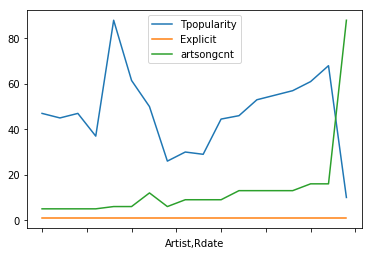

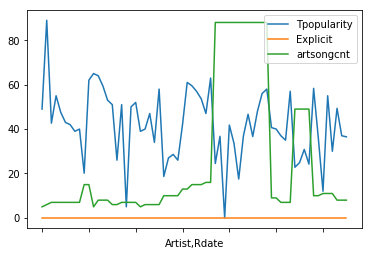

In [70]:
pg13artists_ms[['Tpopularity', 'Explicit', 'artsongcnt']].plot.line()
xartists_ms[['Tpopularity', 'Explicit', 'artsongcnt']].plot.line()

## 7.  Artist w/ most solo - per release date - artists track count // avg track popularity

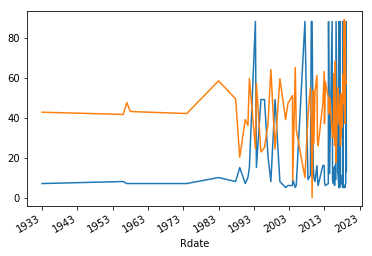

In [65]:
artist_mostsolo.groupby(['Rdate'])['artsongcnt'].mean().plot()
artist_mostsolo.groupby(['Rdate'])['Tpopularity'].mean().plot()

## 8.  Artist w/ most solo && high pop
###  per release date - artists track count // avg track popularity

In [57]:
popart_ms = artist_mostsolo[artist_mostsolo['Tpopularity']<=43.17]

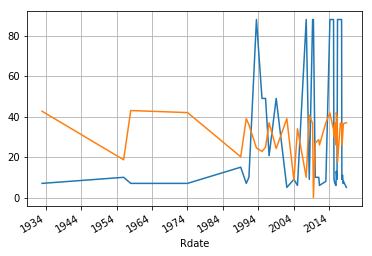

In [64]:
popart_ms.groupby('Rdate')['artsongcnt'].mean().plot(stacked=True)
popart_ms.groupby('Rdate')['Tpopularity'].mean().plot(grid=True)

### 9.  Artist w/ most solo && high pop (unfilled stack step)
####  per release date - artists track count // avg track popularity

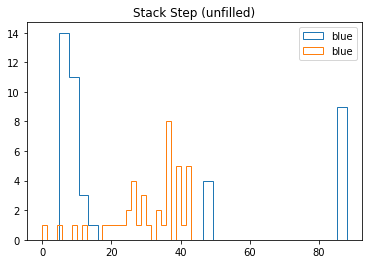

In [71]:
ibins = 30
x = popart_ms.Tpopularity
x1 = popart_ms.artsongcnt
colors = ['blue', 'orange', 'green']
plt.hist(x1, ibins, histtype='step', stacked=True, fill=False, label=colors)
plt.hist(x, ibins, histtype='step', stacked=True, fill=False, label=colors)
plt.legend(loc="upper right")
plt.title('Stack Step (unfilled)')
plt.show()

<Figure size 432x288 with 0 Axes>

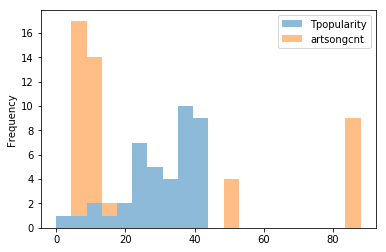

In [75]:
plt.figure();
popart_ms.groupby(['Rdate', 'Artist'])['Tpopularity', 'artsongcnt'].mean().plot.hist(stacked=True, bins=20, alpha=0.5)

## 10. RECALL STATIPY_DF ( + track columns)
 scatter - popularity / explicit count
 
 s=statipy_df['artsongcnt']*5

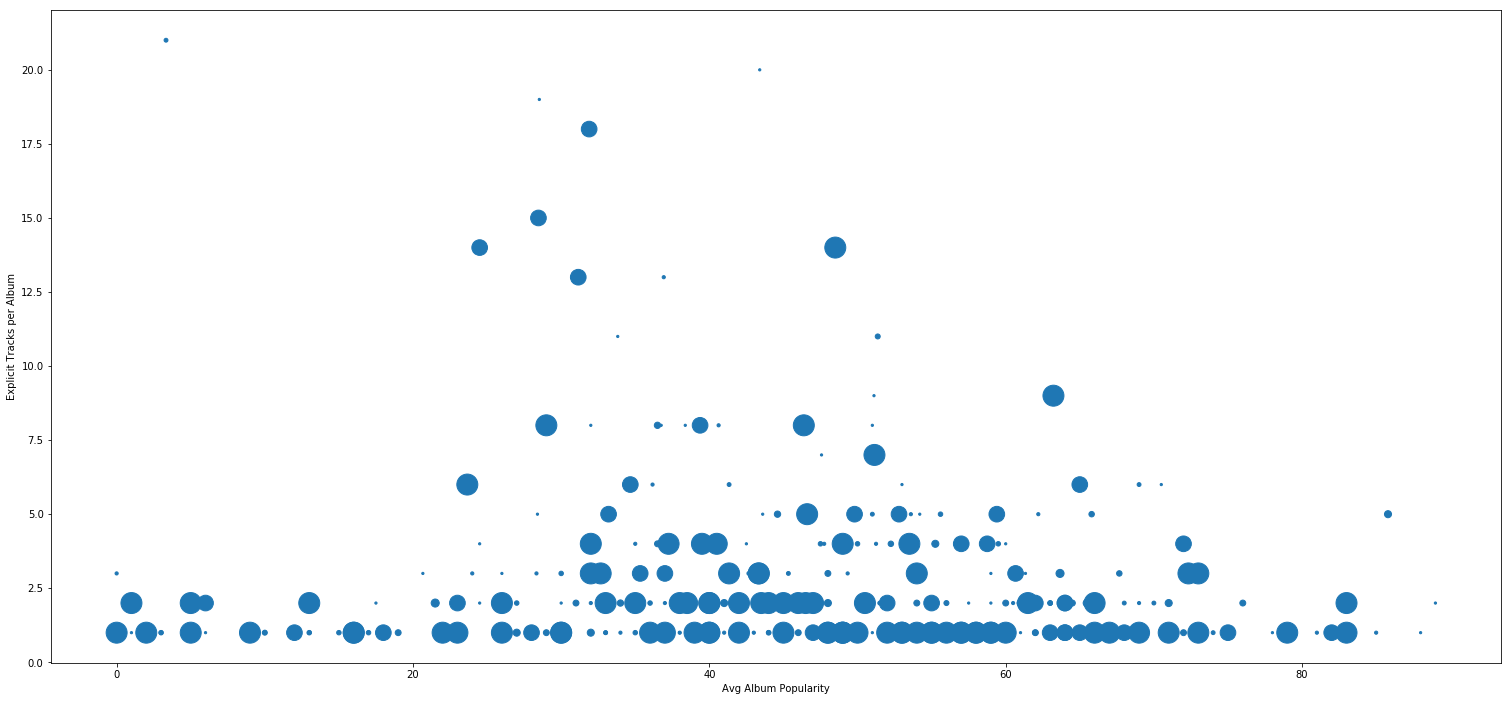

In [87]:
x = statipy_df.groupby(['Rdate'])['Tpopularity'].mean()
y = statipy_df.groupby(['Rdate'])[['Explicit']].count()

fig, ax = plt.subplots(figsize=(26, 12))
ax.scatter(x=x, y=y, s=statipy_df['artsongcnt']*5);
ax.set_xlabel('Avg Album Popularity')
ax.set_ylabel('Explicit Tracks per Album')

plt.show()

In [89]:
popular_tracks= statipy_df[statipy_df['Tpopularity']>=43.71]

## 11. Scatter plot 2
### popular_tracks ( + track columns) popularity / explicit content x track count
 
### high pop only

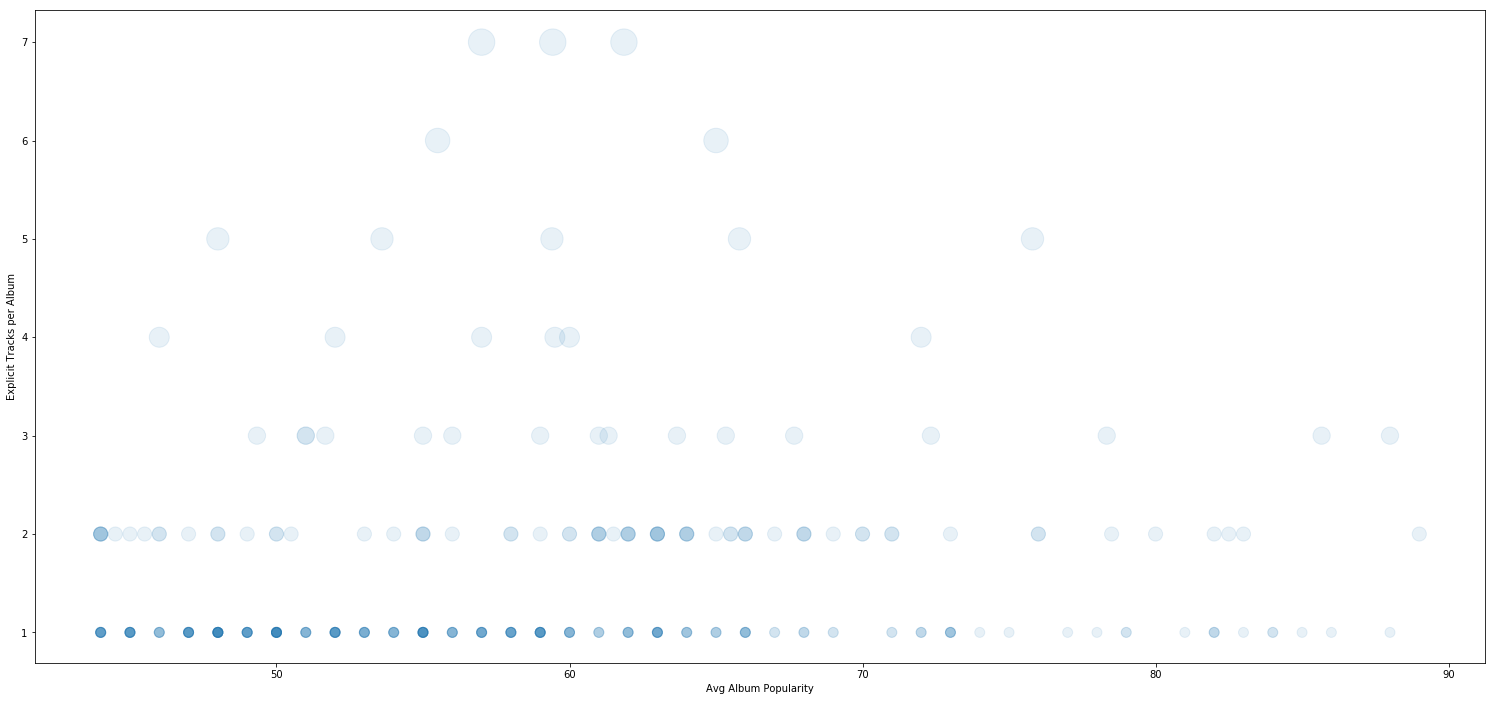

In [93]:
x = popular_tracks.groupby(['Album'])['Tpopularity'].mean()
y = popular_tracks.groupby(['Album'])['Explicit'].count()
s = popular_tracks.groupby(['Album'])['Track'].count()

fig, ax = plt.subplots(figsize=(26, 12))
ax.scatter(x, y, s*100, alpha=0.10);
ax.set_xlabel('Avg Album Popularity')
ax.set_ylabel('Explicit Tracks per Album')

plt.show()

## 12. Most popular Artist w/ most solos
### highrank_artistsolo
 
### high pop && freq

In [77]:
popular_solo = solo_df[solo_df['Tpopularity']>=43]

In [81]:
freq_popularsolo = popular_solo[popular_solo['artsongcnt']>=8]

In [82]:
highrank_artistsolo = freq_popularsolo.groupby(['Artist'])[['Artist', 'Tpopularity', 'artsongcnt']].mean()

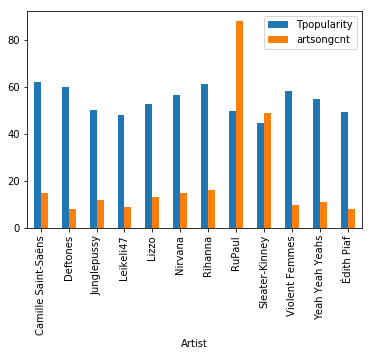

In [83]:
highrank_artistsolo.plot.bar()

## 13. Most popular Artist w/ most repeats! (>3)
### mostfreq_pop
### high pop && freq

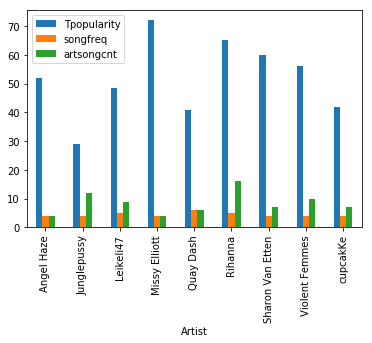

In [103]:
mostfreq_pop = no_solo[no_solo['songfreq']>3]
mostfreq_pop.groupby('Artist').mean().plot.bar()

## 14. Narrowing down 

### Most popular Artist

In [104]:
most_popular = statipy_df[statipy_df['Tpopularity']>=43]

In [107]:
most_popular_y = most_popular[['Track', 'Explicit', 'Tpopularity', 'Artist', 'Rdate', 'artsongcnt', 'songfreq']]
most_popular_y.head()

,Track,Explicit,Tpopularity,Artist,Rdate,artsongcnt,songfreq
0,Paradise,False,49,Voyage,2018-02-14,1,1
1,Tech Noir,False,56,Gunship,2015-07-24,1,1
6,Sissy That Walk,False,67,RuPaul,2014-02-24,88,2
7,Level Ya Pussy Up,False,49,Aja,2017-02-02,5,1
8,Pose,False,55,Naomi Smalls,2018-12-27,1,1


In [108]:
most_popular_y['Rdate'] = pd.DatetimeIndex(most_popular_y['Rdate']).year

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
most_popular_y

,Track,Explicit,Tpopularity,Artist,Rdate,artsongcnt,songfreq
0,Paradise,False,49,Voyage,2018,1,1
1,Tech Noir,False,56,Gunship,2015,1,1
6,Sissy That Walk,False,67,RuPaul,2014,88,2
7,Level Ya Pussy Up,False,49,Aja,2017,5,1
8,Pose,False,55,Naomi Smalls,2018,1,1
10,DRAG UP YOUR LIFE,False,48,RuPaul,2018,88,1
11,1999,False,82,Charli XCX,2018,2,1
12,Soak It Up (Remix),True,44,Monét X Change,2018,2,2
16,Kitty Girl (feat. The Cast of Rupaul's Drag Ra...,False,63,RuPaul,2018,88,2
17,Trophy,True,48,Charli XCX,2016,2,1


In [111]:
most_popular_y['artsongcnt'].mean()

10.678638941398866

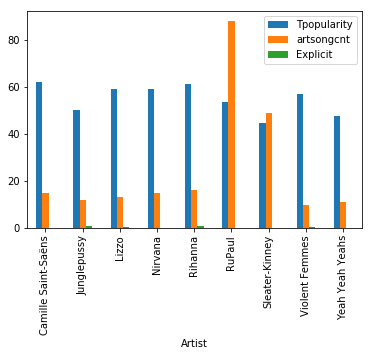

In [117]:
popart_mostfreq = most_popular_y[most_popular_y['artsongcnt']>=10]
popart_mostfreq.groupby('Artist')[['Tpopularity', 'artsongcnt', 'Explicit']].mean().plot.bar()

## 15. statipy_df = year 

### Explicit tracks

In [118]:
statipy_year = statipy_df

In [119]:
statipy_year['Rdate'] = pd.DatetimeIndex(statipy_year['Rdate']).year

In [121]:
statipy_year.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,songfreq,artsongcnt
0,Paradise,False,49,Voyage,Paradise,2018,1,1
1,Tech Noir,False,56,Gunship,GUNSHIP,2015,1,1
2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015,1,1
3,Night,False,39,John Carpenter,Lost Themes,2015,1,1
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017,1,1


In [123]:
explicit_tracks = statipy_year[statipy_year['Explicit']==True]

In [131]:
freqex_tracks = explicit_tracks[explicit_tracks['songfreq']>=5]

In [132]:
freqex_tracks

,Track,Explicit,Tpopularity,Artist,Album,Rdate,songfreq,artsongcnt
487,Money,True,46,Leikeli47,Money,2016,5,9
491,Sex With Me,True,65,Rihanna,ANTI (Deluxe),2016,5,16
499,Decline Him,True,41,Quay Dash,Transphobic,2017,6,6
536,Money,True,58,Leikeli47,Wash & Set,2017,5,9
564,Decline Him,True,41,Quay Dash,Transphobic,2017,6,6
674,Sex With Me,True,65,Rihanna,ANTI (Deluxe),2016,5,16
690,Decline Him,True,41,Quay Dash,Transphobic,2017,6,6
702,Money,True,46,Leikeli47,Money,2016,5,9
732,Sex With Me,True,65,Rihanna,ANTI (Deluxe),2016,5,16
816,Money,True,46,Leikeli47,Money,2016,5,9


In [138]:
top_freqartex = freqex_tracks.groupby('Artist')[['Tpopularity', 'artsongcnt']].mean()

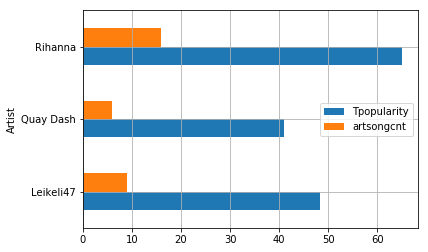

In [139]:
top_freqartex.plot.barh(grid=True)

In [140]:
pg_tracks = statipy_year[statipy_year['Explicit']==False]

In [159]:
freqpg_tracks = pg_tracks[pg_tracks['songfreq']>=3]

In [160]:
freqpg_tracks

,Track,Explicit,Tpopularity,Artist,Album,Rdate,songfreq,artsongcnt
43,Glamazon,False,57,RuPaul,Glamazon,2011,3,88
129,Adrenaline (feat. Myah Marie),False,60,RuPaul,Born Naked,2014,3,88
132,Adrenaline (feat. Myah Marie),False,60,RuPaul,Born Naked,2014,3,88
133,Glamazon,False,57,RuPaul,Glamazon,2011,3,88
157,"Shake, Rattle And Roll",False,51,Big Joe Turner,Shake Rattle & Rock,2007,3,4
194,"Shake, Rattle And Roll",False,51,Big Joe Turner,Shake Rattle & Rock,2007,3,4
218,Adrenaline (feat. Myah Marie),False,60,RuPaul,Born Naked,2014,3,88
228,Glamazon,False,43,RuPaul,"Essential, Vol. 2",2017,3,88
282,The End of the World,False,60,Sharon Van Etten,The End of the World,2017,4,7
300,Right Wing Pigeons,False,26,The Dead Milkmen,Big Lizard In My Back Yard,1985,3,3


In [163]:
top_freqartpg = freqpg_tracks.groupby('Artist')[['Tpopularity', 'artsongcnt', 'Explicit']].mean()

## 16. artist pg13 mean (most repeats)

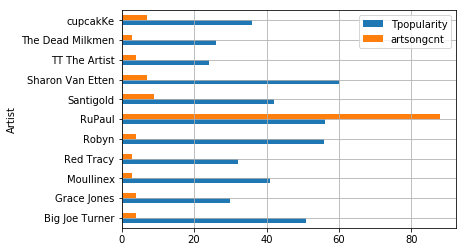

In [164]:
top_freqartpg.plot.barh(grid=True)

## 17. artist pg13 mean (most pop)

In [170]:
pgpop_tracks = pg_tracks[pg_tracks['Tpopularity']>=43]

In [171]:
pg_art_info = pgpop_tracks.groupby(['Artist', 'songfreq'])[['Tpopularity']]

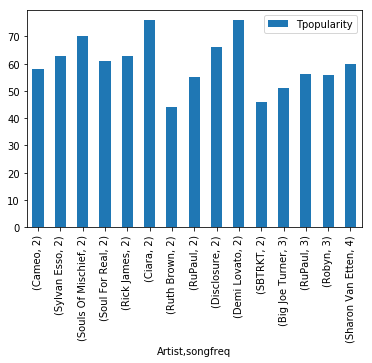

In [172]:
pg_art_info.mean().sort_values('songfreq').tail(15).plot.bar()

## 18. statipy_year

#### artist mean stats x  (oldest dates)
#### artist mean stats x  (newest dates)

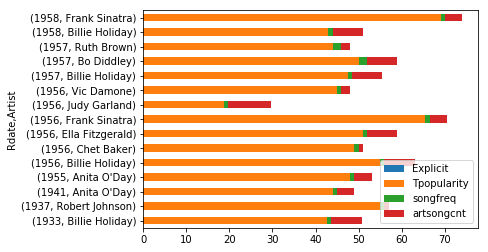

In [178]:
old_tracks = statipy_year.groupby(['Rdate', 'Artist']).mean().head(15)
old_tracks.plot(kind='barh',stacked=True)

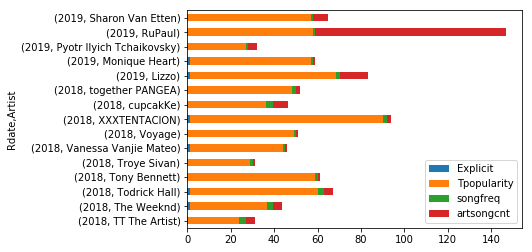

In [181]:
newest_tracks = statipy_year.groupby(['Rdate', 'Artist']).mean().tail(15)
newest_tracks.plot(kind='barh',stacked=True)

## 18. statipy_year + df

#### high popularity

In [182]:
statipy_highpop = statipy_df[statipy_df['Tpopularity']>=43]

In [185]:
statipy_highpop.groupby(['Artist', 'Rdate'])[['Tpopularity', 'songfreq', 'artsongcnt']].mean()

Tpopularity  songfreq  artsongcnt
Artist                  Rdate                                   
2Pac                    2014     43.000000  1.000000         1.0
Aaron Copland           1960     50.000000  1.000000         1.0
Adore Delano            2014     49.000000  1.000000         1.0
Adrianne Lenker         2018     58.000000  1.000000         1.0
Agnes Obel              2013     53.000000  1.000000         1.0
Aja                     2017     48.000000  1.000000         5.0
                        2018     46.000000  1.000000         5.0
Al B. Sure!             1988     53.000000  1.000000         1.0
Alabama Shakes          2012     52.000000  2.000000         4.0
                        2015     44.500000  1.000000         4.0
Alaska Thunderfuck      2015     46.500000  1.000000         4.0
                        2016     48.000000  1.000000         4.0
Alban Berg              2012     45.000000  1.000000         1.0
Alice Cooper            1972     66.000000  1.000000         1.0
Amara La Negra          2018     46.000000  1.000000         1.0
Angel Haze              2012     52.000000  4.000000         4.0
Angel Olsen             2016     50.000000  1.000000         1.0
Anita O'Day             1941     44.000000  1.000000         4.0
                        1955     48.000000  1.000000         4.0
                        1961     45.000000  1.000000         4.0
                        2015     57.000000  1.000000         4.0
Antonio Vivaldi         2014     63.000000  1.000000         2.0
Aretha Franklin         1967     73.000000  1.000000         1.0
Ariana Grande           2018     77.833333  1.666667         6.0
Azealia Banks           2014     51.000000  3.000000         4.0
                        2016     44.000000  1.000000         4.0
BLACKPINK               2018     57.000000  1.000000         1.0
BROCKHAMPTON            2018     68.000000  1.000000         2.0
Bauhaus                 1981     47.000000  1.000000         2.0
                        1986     55.000000  1.000000         2.0
...                                    ...       ...         ...
The Weeknd              2015     83.000000  1.000000         4.0
                        2018     81.000000  3.000000         4.0
Todrick Hall            2016     49.000000  1.000000         4.0
                        2018     59.000000  3.000000         4.0
Tony Bennett            2018     59.000000  1.000000         1.0
Tony! Toni! Toné!       1990     59.000000  1.000000         1.0
Too $hort               1996     57.000000  1.000000         1.0
Trixie Mattel           2017     46.000000  1.000000         1.0
Twenty One Pilots       2015     83.000000  2.000000         2.0
UGK                     2007     55.000000  1.000000         1.0
Vanessa Vanjie Mateo    2018     43.000000  1.000000         1.0
Vic Damone              1956     45.000000  1.000000         2.0
                        2012     58.000000  1.000000         2.0
Violent Femmes          1983     57.000000  2.714286        10.0
Voyage                  2018     49.000000  1.000000         1.0
Warpaint                2016     56.000000  2.000000         2.0
Ween                    1994     43.000000  1.000000         1.0
Whitney Houston         1987     60.000000  1.000000         2.0
                        2006     55.000000  1.000000         2.0
Wolfgang Amadeus Mozart 1995     68.000000  1.000000         4.0
                        2004     64.000000  1.000000         4.0
                        2006     62.000000  1.000000         4.0
                        2011     48.000000  1.000000         4.0
XXXTENTACION            2018     89.000000  2.000000         2.0
Yeah Yeah Yeahs         2003     50.000000  2.000000        11.0
                        2009     47.000000  1.666667        11.0
alt-J                   2017     58.000000  2.000000         2.0
the bird and the bee    2008     43.000000  2.000000         4.0
together PANGEA         2018     48.000000  2.000000         2.0
É

In [186]:
statipy_highpop.describe()

,Tpopularity,Rdate,songfreq,artsongcnt
count,529.000000,529.000000,529.000000,529.000000
mean,58.419660,2004.404537,1.570888,10.678639
std,10.791835,16.884267,0.872118,22.931526
min,43.000000,1933.000000,1.000000,1.000000
25%,50.000000,1995.000000,1.000000,1.000000
50%,57.000000,2012.000000,1.000000,2.000000
75%,65.000000,2017.000000,2.000000,6.000000
max,90.000000,2019.000000,5.000000,88.000000
